# Universidad de Costa Rica
## Escuela de Ingeniería Eléctrica
### IE0499 - Proyecto Eléctrico
### Segundo semestre del 2020


Elaborado por Jeaustin Sirias Chacón

# *La ley de Benford desde cerca*

> Esta actividad reúne herramientas de programación y la teoría clásica de la probabilidad en un estudio de aplicación con la Ley de Benford como parte del fortalecimiento a los tópicos del curso Modelos Probabilísticos de Señales y Sistemas, bajo el Proyecto Electrico *Estudio y simulación de aplicaciones de la teoría de probabilidad en la ingeniería eléctrica*.

---


## La ley de Benford

### Historia

Echando un vistazo al año 1930 el astrónomo Simon Newcomb tuvo la curiosidad de observar que las hojas en uno de sus libros se encontraban notablemente más desgastadas cuando el primer dígito en las páginas iniciaban particularmente con el número 1. 


<img align='center' src='https://media.giphy.com/media/DHqth0hVQoIzS/giphy.gif'>



El hallazgo condujo a formalizar que probabilísticamente era mayormente posible dar con un 1 en el dígito inicial y sucesivamente las posibilidades se reducían para los números {2, 3, ..., 9} de hallarse como primer dígito de forma fortuita. Inicialmente el resultado del sustento fue la propuesta de que para el la probabilidad de ocurrencia de cada símbolo numeral i, es:


### $${\displaystyle P(i) = \log(i+1) - \log(i)}$$

Ya para 1930, de una manera no tan formal, el físico Frank Benford sometió la información histórica de eventos cotidianos que incluían constantes físicas, contenidos estadísticos poblacionales, áreas geográficas y otros con el objetivo de verificar que el primer dígito distinto de cero observado aleatoriamente aparece con menor frecuencia con valores más grandes bajo un comportamiento logarítmico. Posteriormente Ted Hill finalmenyte formalizó esta hipótesis de años dando paso a la *Ley de números anómalos de Benford-Newcomb.*
### Postulado
*Sea N la primera cifra en una magnitud aleatoria, no nula tal que $N = {1, 2, 3, ..., 9}$. Entonces la probabilidad de ocurrencia de N es:* 


### $$\displaystyle P(N) = \log(N + 1) - \log(N) $$


La distribución por frecuencia, entonces para cada dígito se visualiza de la siguiente forma:


<img align='center' src='https://i.imgur.com/NHK3b65.png'>

Algunos escenarios concurrentes para someter a prueba la ley de Benford pueden ser:

* Información histórica de una variable climática: temperatura, precipitación, radiación solar...
* El número de 'likes' en cada post de una celebridad reconocida en Instagram.
* El número en las placas vehiculares observadas durante todo un día en la GAM.
* La cantidad de nuevos casos positivos, diarios en cada cantón desde el inicio de la pandemia del COVID-19 en Costa Rica.
* Los nacimientos diarios a nivel nacional desde 1990 hasta el presente.
* Los precios de los productos en un supermercado o en una tienda.

Luego, resulta bastante relevante la posibilidad de implementar una breve rutina en Python capaz de corroborar la ley de Benford a partir de una base de datos local de la que se intuye puede seguir dicho patrón de una manera visual más cálida, de modo que para iniciar se importan las siguientes librerías científicas conocidas:

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
```


Es de beneficio aprovechar los conocimientos en programación orientada a procedimientos para definir un flujo de ejecución sencillo. Una estrategia funcional es definir una cadena de funciones con procedimientos separados que operen sobre una base datos unifilar; tal así 

      

### 1. Una función que lea la base de datos en formato .csv y la convierta en una lista:

In [210]:
import pandas as pd
import numpy as np

def readData(inputDs, indexName): #Por ejemplo, llamar la funcion como readData('nacimientos.csv', indexName = CR)

    data = pd.read_csv(inputDs, header = None, skiprows = 1, index_col = 0)
    return np.array(data.loc['{}'.format(indexName)]) #retorna una lista con los valores a estudiar


### 2. Una función que tome la lista anterior y lea el primer dígito no nulo en cada uno de los elementos, ademas de contar su ocurrencia y probabilidad:

In [211]:
import numpy as np

def computeFstDigit(vector):

    #Se definen las variables a necesitar
    fstDigit = []; strVect = []; strSize = []
    vecSize = np.arange(0, len(vector), 1)

    #Se convierte cada elemento de la lista en una cadena de caracteres:
    for i in vecSize:

        num = vector[i]
        if num == 0: continue;
        else: strVect.append(str(num));

    strSize = np.arange(0, len(strVect), 1)

    #Se lee el primer simbolo de cada cadena de caracteres. i.e, en '134', se lee '1'
    for j in strSize:

        if strVect[j][0] == '0': fstDigit.append(int(strVect[j][2]));
        else: fstDigit.append(int(strVect[j][0])); #se almacenan los digitos ahora como enteros

    #Ahora se lee cuantas veces se repite 1, 2, 3, ..., 9 en fstDigit
    counters = [] #Almacenamos el numero de veces que se repite cada unmero
    for k in np.arange(1, 10, 1):
        count = fstDigit.count(k)
        counters.append(count)
    totalSum = sum(counters)
    dataPerc = np.array([i/totalSum for i in counters])

    return counters, dataPerc, totalSum
    #counters is a 1x9 vector with the number of ocurrences per digit
    #dataPerc is the percentage of each each occurrence
    #totalSum is the sum of all occurrences from 1 to 9

### 3.  Una función que calcule el número de aciertos pronosticados usando la probabilidad de ocurrencia de cada dígito, según Benford, para la base de datos ingresada:

In [212]:
def lookForExpectedCounts(countsNum):

    bfVals = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6] #probabilidades de benford
    predictedVals = np.array([round((k*countsNum)/100) for k in bfVals]) #numero de ocurrencias pronosticadas

    return predictedVals, bfVals

### 4. Una función que visualice  e imprima un resumen sobre la base de los procedimientos anteriores:

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tikzplotlib as tikz

def printSummary(dataset, ObsCounts, ExpCounts, pReal, bfVals):

    print('Resumen de conteos por símbolo:')
    print('Conteos observados: {}'.format(ObsCounts))
    print('Conteos predichos: {}'.format(ExpCounts))
    print("\n\n\nProbabilidad de ocurrencia por símbolo (1, 2, ..., 9):\n")
    # Say, "the default sans-serif font is COMIC SANS"
    #plt.rcParams['font.sans-serif'] = "Comic Sans MS"
    # Then, "ALWAYS use sans-serif fonts"
    plt.rcParams['font.sans-serif'] # = "sans-serif"
    
    
    for i in np.arange(0, 9, 1):

        print('Símbolo {num}: Prob. observada: {p1}, Prob. Benford: {p2}'.format(num = i +1, 
               p1 = round(pReal[i], 3),
               p2 = round(bfVals[i]/100, 3)))
        
    # Visualizacion
    fig = plt.figure(tight_layout = True, figsize = (11, 8))
    figGrid = gridspec.GridSpec(2, 2)
    rawData = fig.add_subplot(figGrid[0, 0])
    dataHist = fig.add_subplot(figGrid[0, 1])
    benfordFreq = fig.add_subplot(figGrid[1, 0])
    benfordDist = fig.add_subplot(figGrid[1, 1])

    # linspaces
    xData = np.arange(0, len(dataset), 1)
    xDigits = np.arange(1, 10, 1)

    # Curva histórica
    rawData.plot(xData, dataset, color = 'tab:red')
    rawData.set_xlabel('Tiempo')
    rawData.set_ylabel('Precipitación')
    rawData.set_title('Curva histórica de precipitación 1985-2019')

    # Histograma
    dataHist.hist(dataset, bins = 25, color = 'g', histtype='bar', rwidth=0.8)
    dataHist.set_ylabel('Frecuencia')
    dataHist.set_xlabel('Precipitación')
    dataHist.set_title('Histograma')

    # Curvas de Probabilidad
    benfordDist.bar(xDigits, ObsCounts, color = 'teal', 
                    label = 'Ocurrencias observadas en el primer dígito')

    for i in  xDigits:

        if i == xDigits[-1]:
            benfordDist.plot(i, ExpCounts[i - 1], marker = 's', 
                             markersize = 8, color = 'firebrick', 
                             label = 'Ocurrencias esperadas según Benford')

        else:
            benfordDist.plot(i, ExpCounts[i-1], marker = 's', markersize = 8, color = 'firebrick')

    benfordDist.set_xlabel('Símbolo en el primer dígito')
    benfordDist.set_xticks(xDigits)
    benfordDist.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8', '9'))
    benfordDist.set_ylabel('Número de ocurrencias')
    benfordDist.set_title('Distribución: Lo esperado y lo observado')
    benfordDist.legend()

    # Distribución 
    benfordFreq.plot(xDigits, pReal*100, color = 'orangered', 
                     lw = 3, label = 'Probabilidad por ocurrencias observadas')
    
    benfordFreq.plot(xDigits, bfVals, '--', 
                     color = 'tab:blue', lw = 3, 
                     label = 'Lo que predijo Benford')
    
    benfordFreq.set_xlabel('Símbolo en el primer dígito')
    benfordFreq.set_ylabel('Frecuencia [%]')
    benfordFreq.set_title('Probabilidad por dígito dominante')
    benfordFreq.legend()

    fig.align_labels()
    tikz.save('tfig.tex')
    plt.savefig('fig_5.png')
    plt.show()


### ¿Y ahora?

Entonces bien, se facilita hacer llamadas a funciones en el orden anterior. Para este ejemplo se utilizará una base de datos que contiene los registros de la precipitación histórica en decadías desde 1985 hasta 2019 para algunas localizaciones de Costa Rica. Dicho dominio es un candidato aceptable dado a que:

* Se cuenta con una elevada cantidad de muestras. *¿Cuántas decadías hay desde 1985 hasta 2019?*
* La precipitación es una variable física, por lo que no son valores aleatoreos.




**Un dato interesante**: Un mes tiene tres [decadías](http://iridl.ldeo.columbia.edu/maproom/Food_Security/Locusts/Regional/Dekadal_Rainfall/index.html), en donde las dos primeras tienen 10 días; es decir, 20 en total. La tercera decadía depende de cuántos días le resten al mes para terminar; por ejemplo, la tercera decadía de Enero tiene 11, la de Febrero, a lo sumo 9 (si es un año bisiesto) y del mismo modo para los meses siguientes. En total un año contendrá 36 decadías.

Resumen de conteos por símbolo:
Conteos observados: [372, 176, 104, 103, 78, 65, 59, 65, 60]
Conteos predichos: [326 190 135 105  85  72  63  55  50]



Probabilidad de ocurrencia por símbolo (1, 2, ..., 9):

Símbolo 1: Prob. observada: 0.344, Prob. Benford: 0.301
Símbolo 2: Prob. observada: 0.163, Prob. Benford: 0.176
Símbolo 3: Prob. observada: 0.096, Prob. Benford: 0.125
Símbolo 4: Prob. observada: 0.095, Prob. Benford: 0.097
Símbolo 5: Prob. observada: 0.072, Prob. Benford: 0.079
Símbolo 6: Prob. observada: 0.06, Prob. Benford: 0.067
Símbolo 7: Prob. observada: 0.055, Prob. Benford: 0.058
Símbolo 8: Prob. observada: 0.06, Prob. Benford: 0.051
Símbolo 9: Prob. observada: 0.055, Prob. Benford: 0.046


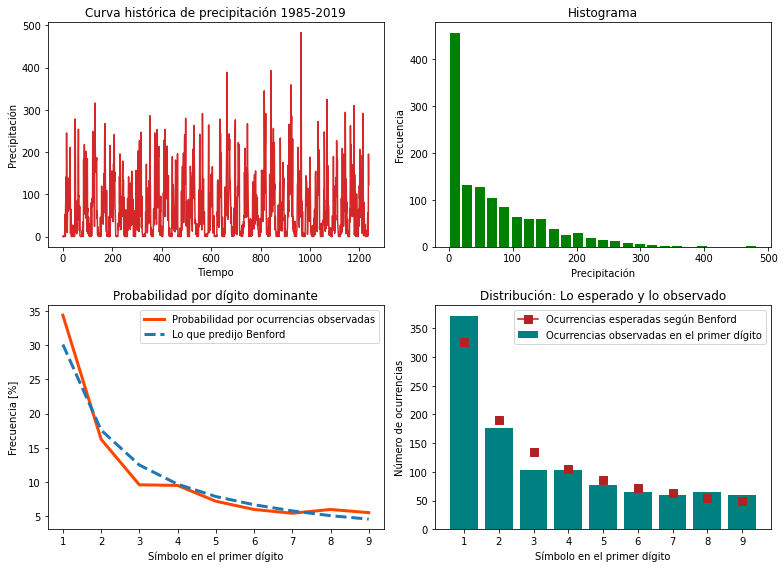

In [214]:
#Se llama la base de datos para generar la lista de informacion
import tikzplotlib as tk
import numpy as np
data = readData('rainfall.csv', 'Poas') #Poas, Liberia, Carara, La Pita, Prusia, Rodeo...

#Se calculan el numero de ocurrencias de {1, 2, ..., 9} en el primer digito de cada elemento de la lista
#Se calcula su probabilidad de ocurrencia
#Se calcula el total de ocurrencias (que puede ser distinto de el numero de elementos iniciales, si hay ceros)
ocurrencias, prob_ocurrencias, conteos_totales = computeFstDigit(data)

#Se calculan las ocurrencias esperadas segun la ley de Benford 
ocurrencias_predecidas, prob_benford = lookForExpectedCounts(conteos_totales)

#Se visualizan los resultados
printSummary(data, ocurrencias, ocurrencias_predecidas, prob_ocurrencias, prob_benford)

### Observaciones

* La mayoría de las muestras de precipitación ocurridas tienen magnitudes entre los 0 mm y 100 mm.
* Se corrobora que el número de ocurrencias por símbolo en el dígito dominante es menos frecuente conforme aumenta su valor; por ejemplo, 1 obtuvo un 34.4 % de las ocurrencias; 2, un 16.3 % y 9, un 4.6 %. *¿Sigue este comportamiento, la ley de Benford?*







# Actividad: ¿Puede la ley de Benford ir más allá de su primera cifra?


En general, la ley de Benford no solamente aplica para el primer dígito de cada número en un conjunto de datos. Pueden elaborarse generalizaciones para la probabilidad de ocurrencia para el segundo dígito más siginificativo a partir de su función de probabilidad $P(N_{k})$, en donde $k\in \mathbb{Z}^{+}$ es el valor posicional en la cifra. Por ejemplo, la probabilidad de que el segundo dígito sea 3 es:

### $$ \displaystyle P(3_{2}) = \log\left ( 1 + \frac{1}{13} \right ) + \log\left ( 1 + \frac{1}{23} \right ) + ... + \log\left ( 1 + \frac{1}{93} \right ) \approx 0.104$$

Asimismo, la generalización puede llevarse inclusive a evaluar probabilidades conjuntas; por ejemplo, *¿Qué probabilidades hay que que el primer dígito sea 1 y el segundo, 7?*. Puede suponerse ahora que $N$ es un número entero positivo tal que $10 \leq N \leq 99 $ y volver a calcular $P(N)$ para dichos valores, entonces:


### $$\displaystyle P(17) = \log\left ( 1 + \frac{1}{17} \right ) \approx 0.025 $$

De este razonamiento puede intuirse el porqué el segundo dígito más significativo sí toma el cero como una cifra no nula: ¿qué ocurriría al calcular $P(0_{1})$?, ¿qué diferencia hay al calcular $P(0_{2})$?

## La ley de benford y el teorema de Bayes

Es un ejercicio relevante el intento de relacionar estas dos formulaciones matemáticas a partir del concepto de [probabilidad condicional](https://es.wikipedia.org/wiki/Probabilidad_condicionada) a partir de un juego con las probabilidades de las dos primeras cifras más significativas; por ejemplo, *¿qué probabilidad tiene el segundo dígito, D2, de ser un 9 dado a que el primero, D1, fue un 3?*. Para comprender mejor la probabilidad condicional entre eventos la elaboració de un diagrama de árbol es útil para reducir su grado de abstracción cuando las probabilidades se tornan complicadas:


<img align='center' src='https://i.imgur.com/m1AKE1V.png' width ="500" height=500/>



De una forma general a continuació se formula un cuestionario asistido por progamación para evidenciar una manera de involucrar el manejo de la ley de Benford y el teorema de Bayes:


###  `El preámbulo`: Estudiando las probabilidades condicionales a partir de la ocurrencia del segundo dígito dada la ocurrencia del primero

En primera instancia como `hipótesis nula` se asumirá que existe dependencia probabilística entre el primer dígito `D1` y el segundo dígito `D2` de un valor numérico cualquiera; es decir, $P(A|B) \neq P(A)$, hasta que se demuestre lo contrario. Una solución programada para obtener la probabilidad conjunta de los dos primeros dígitos como una `combinación` de casos de la forma $(10, 11, 12, ..., 99)$ es la siguiente:

In [215]:
#Obteniendo la probabilidad conjunta de las dos primeras cifras usando la ley de Benford
import numpy as np

combinaciones = np.arange(10, 100, 1) #un vector de la forma [10, 11, 12, ..., 99]
prob_conjunta = [np.log10(i + 1) - np.log10(i) for i in combinaciones] #se ejecuta P(N) para N = [10, 11, ..., 99]

Ahora que se cuenta con la probabilidad conjunta de los dos primeros dígitos, entonces puede obtenerse la probabilidad de ocurrencia condicional del segundo dígito ``D2`` dado al primero, ``D1``, de la forma:


### $$P(D2|D1) = \frac{P(D2 \cap D1)}{P(D1)}$$

De forma progamada se procesa entonces:

In [216]:
#obteniendo la probabilidad condicional usando la ley de Benford
import numpy as np

#las probabilidades de ocurrencia del primer digito no nulo [1, ..., 9] por Benford son:
prob_d1 = [np.log10(1+i) - np.log10(i) for i in np.arange(1, 10, 1)]
#recordar que esto es [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]

#definiendo los linspaces
prob_d1Size = np.arange(0, len(prob_d1), 1)
prob_conjuntaSize = np.arange(0, len(prob_conjunta), 1)

#calculando las probabilidades condicionales posibles:
print('Probabilidades condicionales P(D2|D1):\n.\n.\n.')
prob_condicional = []; q = 0
for i in prob_d1Size:
    k = 0
    for j in prob_conjuntaSize:
        
        if k < 10:
            P = round(prob_conjunta[j+q]/prob_d1[i], 5)
            prob_condicional.append(P)
            k += 1
            print('P(', str(combinaciones[j])[1], '|', str(i+1), ') = ', str(P))
    q += 10

Probabilidades condicionales P(D2|D1):
.
.
.
P( 0 | 1 ) =  0.1375
P( 1 | 1 ) =  0.12553
P( 2 | 1 ) =  0.11548
P( 3 | 1 ) =  0.10692
P( 4 | 1 ) =  0.09954
P( 5 | 1 ) =  0.09311
P( 6 | 1 ) =  0.08746
P( 7 | 1 ) =  0.08246
P( 8 | 1 ) =  0.078
P( 9 | 1 ) =  0.074
P( 0 | 2 ) =  0.12033
P( 1 | 2 ) =  0.11473
P( 2 | 2 ) =  0.10963
P( 3 | 2 ) =  0.10496
P( 4 | 2 ) =  0.10068
P( 5 | 2 ) =  0.09673
P( 6 | 2 ) =  0.09308
P( 7 | 2 ) =  0.08969
P( 8 | 2 ) =  0.08655
P( 9 | 2 ) =  0.08361
P( 0 | 3 ) =  0.11398
P( 1 | 3 ) =  0.11036
P( 2 | 3 ) =  0.10696
P( 3 | 3 ) =  0.10377
P( 4 | 3 ) =  0.10076
P( 5 | 3 ) =  0.09792
P( 6 | 3 ) =  0.09524
P( 7 | 3 ) =  0.0927
P( 8 | 3 ) =  0.09029
P( 9 | 3 ) =  0.08801
P( 0 | 4 ) =  0.11066
P( 1 | 4 ) =  0.10799
P( 2 | 4 ) =  0.10545
P( 3 | 4 ) =  0.10303
P( 4 | 4 ) =  0.10071
P( 5 | 4 ) =  0.0985
P( 6 | 4 ) =  0.09638
P( 7 | 4 ) =  0.09435
P( 8 | 4 ) =  0.0924
P( 9 | 4 ) =  0.09054
P( 0 | 5 ) =  0.10861
P( 1 | 5 ) =  0.1065
P( 2 | 5 ) =  0.10448
P( 3 | 5 ) =  0.10

###  `El hallazgo`: ¿Cómo es la probabilidad condicional del segundo dígito, dada la ocurrencia del primero?

Al inicio del la actividad anterior, se motivó a establecer una hipótesis nula basada en que la ocurrencia del primer y segundo dígito son eventos dependientes hasta que no se pruebe lo contrario. Dado a que ya se cuenta con las probabilidades condicionales se puede intentar desmentir dicha premisa verificando si: 


### $$\displaystyle P(D2|D1) = P(D2)$$

Es decir, elaborar una prueba de independencia basada en las probabilidades $P(N_{2})$ de Benford para el segundo dígito considerando que todos los elementos (0, 1, 2, ..., 9) son no nulos.

In [217]:
import numpy as np
import math

#El vector de probabilidades de Benford para el segundo digito es:
prob_d2 = [0.120, 0.114, 0.109, 0.104, 0.100, 0.097, 0.093, 0.090, 0.088, 0.085]

#el linspace del vector de probs del 2do digito
prob_d2Size = np.arange(0, len(prob_d2), 1)


#Verificamos si P(D2|D1) = P(D2) (para probar independencia de eventos)
#
#
#
#
#MUCHO OJO------REVISAR!-------: DADO AL REDONDEO DE LA PROBABILIDADES PROCESADAS HASTA ACA SE HA PERDIDO PRECISION
#SI LE PIDIERA A PYTHON QUE ESTRICTAMENTE ME SENALE QUE UN CASO ES INDEPENDIENTE SOLO CUANDO P(D2|D1) = P(D2),
#PUES NINGUN CASO DARIA VERDADERO(CON INDEPENDENCIA), AUNQUE P(D2|D1) DIFIERA POR DECIMALES LEJANOS DE P(D2).
#
#EXPERIMENTALMENTE DECIDI PROGRAMAR UN LOOP VERIFICADOR QUE ME DIGA SI LA DIFERENCIA ENTRE P(D2|D1) Y P(D2)
#ES MENOR O IGUAL UN MARGEN DEL 0.001. SI ES MENOR(o =) ENTONCES DIGA QUE LOS EVENTOS SON IDEPENDIENTES.
#
#
#
#
#
#
print('Casos de independencia\n.\n.\n.\n.\n')
for i in prob_d2Size: #loop verificador 
    k = 0
    for j in prob_d1Size:
        
        isDependant = abs(round(prob_condicional[i + k] - prob_d2[i], 5)) #5 DECIMALES
        
        if isDependant <= 0.001:
            print('Hay un error decimal del ', isDependant, ' entre P(D2|D1)=',prob_condicional[i + k], ' y P(D2)=', prob_d2[i])
            print('Hay independencia en P(', str(i), '|', str(i + k + 10)[0], ')\n')
        
        k += 10
        
      

Casos de independencia
.
.
.
.

Hay un error decimal del  0.00033  entre P(D2|D1)= 0.12033  y P(D2)= 0.12
Hay independencia en P( 0 | 2 )

Hay un error decimal del  0.00073  entre P(D2|D1)= 0.11473  y P(D2)= 0.114
Hay independencia en P( 1 | 2 )

Hay un error decimal del  0.00063  entre P(D2|D1)= 0.10963  y P(D2)= 0.109
Hay independencia en P( 2 | 2 )

Hay un error decimal del  0.00096  entre P(D2|D1)= 0.10496  y P(D2)= 0.104
Hay independencia en P( 3 | 2 )

Hay un error decimal del  0.00023  entre P(D2|D1)= 0.10377  y P(D2)= 0.104
Hay independencia en P( 3 | 3 )

Hay un error decimal del  0.00097  entre P(D2|D1)= 0.10303  y P(D2)= 0.104
Hay independencia en P( 3 | 4 )

Hay un error decimal del  0.00046  entre P(D2|D1)= 0.09954  y P(D2)= 0.1
Hay independencia en P( 4 | 1 )

Hay un error decimal del  0.00068  entre P(D2|D1)= 0.10068  y P(D2)= 0.1
Hay independencia en P( 4 | 2 )

Hay un error decimal del  0.00076  entre P(D2|D1)= 0.10076  y P(D2)= 0.1
Hay independencia en P( 4 | 3 )

Hay

Los casos anteriormente identificados muestran independencia de eventos. En general, acá se involucran dos conjuntos: los símbolos `(1, 2, 3, ..., 9)` para el dígito `D1` y `(0, 1, 2, ..., 9)` para `D2` y aunque no todos los casos de probabilidad condicional ocurran de forma independiente, basta con identificar uno solo para asumir la independencia como conjunto. De este modo se determina que `la probabilidad condicional del segundo dígito, dada la ocurrencia del primero, es independiente`.



### `El teorema de Bayes`: Calculando la probabilidad inversa de un dígito posterior dado el anterior

El concepto de la probabilidad condicional inversa entre dos eventos suele ser mal interpretado en términos de que popularmente se cree que $P(A|B) = P(B|A)$. Dicho razonamiento es incorrecto, puesto que la probabilidad depende del orden en que ocurren los sucesos; por ejemplo, la probabilidad de que una persona sea portadora del virus del Dengue dado a que tiene dolor corporal no es igual a la probabilidad de que tenga dolor corporal dado a que porta dicho virus. Así pues uno de los hechos sorprendentes de la regla de Bayes es predecir la posibiidad de ocurrencia de un suceso actual `A` dado a que se supone que ocurrirá otro evento particular `B` a futuro. De este modo una aplicación Bayesiana útil sobre la ley de Benford es que posibilita conocer la probabilidad de que el primer dígito `D1` sea `i` dado a que ocurrirá `j` en `D2`. Una forma generalizada de expresar lo anterior es:


### $$\displaystyle P(D1_{i}|D2) = \frac{P(D2|D1_{i})\cdot P(D1_{i})}{\sum_{j = 1}^{9} P(D2|D1_{j})\cdot P(D1_{j})} $$

Como ya anteriormente se calculó la probabilidad condicional $P(D2|D1)$ y la probabilidad de ocurrencia $P(D1)$, entonces una manera intuitiva de obtener las probabilidades inversas se  propone a continuación:

In [218]:
#primero se calculan los denominadores, 
#ya que seran los mismos para cada i-esimo primer digito D1:
denominadores = []
for i in prob_d2Size:
    
    k = 0; den = 0
    for j in prob_d1Size:

        den += (prob_d1[j] * prob_condicional[i + k])
        k += 10
        
    denominadores.append(den)
    
#se calculan ahora todas las probabilidades inversas (Bayesianas) P(D1|D2)
print('Probabilidades Bayesianas P(D1|D2):\n.\n.\n.\n.\n')
bayes = []
for i in prob_d2Size:
    k = 0
    for j in prob_d1Size:
        
            bay = round((prob_condicional[i + k] * prob_d1[j]) / denominadores[i], 4)
            k += 10
            print('P(', str(j+1), '|', str(i), ') = ', str(bay))
            bayes.append(bay)



Probabilidades Bayesianas P(D1|D2):
.
.
.
.

P( 1 | 0 ) =  0.3459
P( 2 | 0 ) =  0.177
P( 3 | 0 ) =  0.119
P( 4 | 0 ) =  0.0896
P( 5 | 0 ) =  0.0719
P( 6 | 0 ) =  0.06
P( 7 | 0 ) =  0.0515
P( 8 | 0 ) =  0.0451
P( 9 | 0 ) =  0.0401
P( 1 | 1 ) =  0.3318
P( 2 | 1 ) =  0.1774
P( 3 | 1 ) =  0.1211
P( 4 | 1 ) =  0.0919
P( 5 | 1 ) =  0.074
P( 6 | 1 ) =  0.062
P( 7 | 1 ) =  0.0533
P( 8 | 1 ) =  0.0468
P( 9 | 1 ) =  0.0417
P( 1 | 2 ) =  0.3194
P( 2 | 2 ) =  0.1774
P( 3 | 2 ) =  0.1228
P( 4 | 2 ) =  0.0939
P( 5 | 2 ) =  0.076
P( 6 | 2 ) =  0.0639
P( 7 | 2 ) =  0.055
P( 8 | 2 ) =  0.0484
P( 9 | 2 ) =  0.0431
P( 1 | 3 ) =  0.3085
P( 2 | 3 ) =  0.1772
P( 3 | 3 ) =  0.1243
P( 4 | 3 ) =  0.0957
P( 5 | 3 ) =  0.0778
P( 6 | 3 ) =  0.0656
P( 7 | 3 ) =  0.0566
P( 8 | 3 ) =  0.0499
P( 9 | 3 ) =  0.0445
P( 1 | 4 ) =  0.2987
P( 2 | 4 ) =  0.1767
P( 3 | 4 ) =  0.1255
P( 4 | 4 ) =  0.0973
P( 5 | 4 ) =  0.0794
P( 6 | 4 ) =  0.0671
P( 7 | 4 ) =  0.0581
P( 8 | 4 ) =  0.0512
P( 9 | 4 ) =  0.0458
P( 1 | 5 ) =  0.28

Con esto se concluye una aplicación de la probabilidad condicional inversa sobre la ley de Benford. Este sinnúmero de ocurrencias de la forma $P(D1|D2)$ podrían contener información relevante para estudios probabilísticos en múltiples áreas. Después de todo, ¿cuál es la probabilidad de que el primer dígito de un número sea 5 dado a que se supone que el segundo dígito será un 2? Posiblemente calcular su resultado 'a pata' sería una tarea rigurosa. El estudio de la probabilidad asistida por computadora supone una comodidad muy ingeniosa.


